In [ ]:

 import pandas as pd
 import numpy as np
 data={'A':[1,2,np.nan,4,5],
       'B':[np.nan,2,3,np.nan,5],
       'C':['a','b',np.nan,'d','e'],
       'D':['a','a','a','b','b']}

df=pd.DataFrame(data)

print("Orijinal DataFrame:\n", df)

# Ortalama ile doldurma
df["A_ort"] = df["A"].fillna(df["A"].mean())
print("\nOrtalama ile Doldurulmuş DataFrame:\n", df)

# Medyan ile doldurma
df["B_med"] = df["B"].fillna(df["B"].median())
print("\nMedyan ile Doldurulmuş DataFrame:\n", df)

# Mod ile doldurma
df["C_mod"] = df["D"].fillna(df["D"].mode()[0])
print("\nMod ile Doldurulmuş DataFrame:\n", df)

Orijinal DataFrame:
      A    B    C  D
0  1.0  NaN    a  a
1  2.0  2.0    b  a
2  NaN  3.0  NaN  a
3  4.0  NaN    d  b
4  5.0  5.0    e  b

Ortalama ile Doldurulmuş DataFrame:
      A    B    C  D  A_ort
0  1.0  NaN    a  a    1.0
1  2.0  2.0    b  a    2.0
2  NaN  3.0  NaN  a    3.0
3  4.0  NaN    d  b    4.0
4  5.0  5.0    e  b    5.0

Medyan ile Doldurulmuş DataFrame:
      A    B    C  D  A_ort  B_med
0  1.0  NaN    a  a    1.0    3.0
1  2.0  2.0    b  a    2.0    2.0
2  NaN  3.0  NaN  a    3.0    3.0
3  4.0  NaN    d  b    4.0    3.0
4  5.0  5.0    e  b    5.0    5.0

Mod ile Doldurulmuş DataFrame:
      A    B    C  D  A_ort  B_med C_mod
0  1.0  NaN    a  a    1.0    3.0     a
1  2.0  2.0    b  a    2.0    2.0     a
2  NaN  3.0  NaN  a    3.0    3.0     a
3  4.0  NaN    d  b    4.0    3.0     b
4  5.0  5.0    e  b    5.0    5.0     b


i

In [ ]:
import pandas as pd
import numpy as np

data = {
    'A': [1,np.nan,3,np.nan,5],
    'B': [np.nan,2,np.nan,4,np.nan],

}
import pandas as pd
import numpy as np
df = pd.DataFrame(data)
df["A_Doldur"] = df["A"].fillna(method="ffill")
print(df)
df["B_Doldur"] = df["B"].fillna(method="ffill")
print( df)

     A    B  A_Doldur
0  1.0  NaN       1.0
1  NaN  2.0       1.0
2  3.0  NaN       3.0
3  NaN  4.0       3.0
4  5.0  NaN       5.0
     A    B  A_Doldur  B_Doldur
0  1.0  NaN       1.0       NaN
1  NaN  2.0       1.0       2.0
2  3.0  NaN       3.0       2.0
3  NaN  4.0       3.0       4.0
4  5.0  NaN       5.0       4.0


<ipython-input-3-b1bf65b13a35>:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["A_Doldur"] = df["A"].fillna(method="ffill")
<ipython-input-3-b1bf65b13a35>:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["B_Doldur"] = df["B"].fillna(method="ffill")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
data = {
    'A': [1,2,np.nan,4,5],
    'B': [np.nan,2,3,np.nan,5],
    'C':[1,2,3,4,5]}


df = pd.DataFrame(data)
print(df)
doldur=KNNImputer(n_neighbors=2)
df_doldur=pd.DataFrame(doldur.fit_transform(df),columns=df.columns)
print(df_doldur)

     A    B  C
0  1.0  NaN  1
1  2.0  2.0  2
2  NaN  3.0  3
3  4.0  NaN  4
4  5.0  5.0  5
     A    B    C
0  1.0  2.5  1.0
1  2.0  2.0  2.0
2  3.0  3.0  3.0
3  4.0  4.0  4.0
4  5.0  5.0  5.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

def otomatik_regresyon_doldurma(df):
    """
    Tüm eksik değerleri, eksik oranı az olandan başlayarak regresyon ile doldurur.
    """
    df = df.copy()
    eksik_oranlar = df.isnull().mean().sort_values()  # Azdan çoğa

    for hedef_sutun in eksik_oranlar.index:
        if df[hedef_sutun].isnull().sum() == 0:
            continue  # Eksik yoksa atla

        print(f"\n🛠️ '{hedef_sutun}' sütunu dolduruluyor...")

        # Bağımlı sütunlar: diğer sütunlardan eksik olmayanlar
        diger_sutunlar = df.columns.drop(hedef_sutun)
        doldurulabilir_sutunlar = [s for s in diger_sutunlar if df[s].isnull().sum() == 0]

        if not doldurulabilir_sutunlar:
            print(f"⚠️ '{hedef_sutun}' için uygun bağımsız değişken yok. Atlanıyor.")
            continue

        # Eğitim verisi (hedef ve bağımsızlarda eksik olmayan)
        egitim_df = df[df[hedef_sutun].notnull()]
        egitim_df = egitim_df.dropna(subset=doldurulabilir_sutunlar)

        # Tahmin verisi (hedef eksik, bağımsızları dolu)
        tahmin_df = df[df[hedef_sutun].isnull()]
        tahmin_df = tahmin_df.dropna(subset=doldurulabilir_sutunlar)

        if egitim_df.empty or tahmin_df.empty:
            print(f"⚠️ '{hedef_sutun}' için yeterli veri yok. Atlanıyor.")
            continue

        # Model eğitimi
        model = LinearRegression()
        model.fit(egitim_df[doldurulabilir_sutunlar], egitim_df[hedef_sutun])

        # Tahmin ve doldurma
        tahminler = model.predict(tahmin_df[doldurulabilir_sutunlar])
        df.loc[tahmin_df.index, hedef_sutun] = tahminler

        print(f"✅ '{hedef_sutun}' sütunu başarıyla dolduruldu.")

    return df

# Örnek veri
data = {'A': [1, 2, np.nan, 4, 5],
        'B': [6, np.nan, 8, 9, 10],
        'C': [11, 12, 13, 14, 15]}
df = pd.DataFrame(data)

print("🧾 Orijinal DataFrame:")
print(df)

df_doldurulmus = otomatik_regresyon_doldurma(df)

print("\n✅ Doldurulmuş DataFrame:")
print(df_doldurulmus)

🧾 Orijinal DataFrame:
     A     B   C
0  1.0   6.0  11
1  2.0   NaN  12
2  NaN   8.0  13
3  4.0   9.0  14
4  5.0  10.0  15

🛠️ 'A' sütunu dolduruluyor...
✅ 'A' sütunu başarıyla dolduruldu.

🛠️ 'B' sütunu dolduruluyor...
✅ 'B' sütunu başarıyla dolduruldu.

✅ Doldurulmuş DataFrame:
     A     B   C
0  1.0   6.0  11
1  2.0   7.0  12
2  3.0   8.0  13
3  4.0   9.0  14
4  5.0  10.0  15


In [6]:
# Örnek DataFrame
data = {'ID': [1, 2, 3, 4, 5],
        'Yaş': ['25', '30', 'otuz', '40', '45'],
        'Tarih': ['2023-01-01', '2023-01-02', '2023/01/03', '2023-01-04', '2023-01-05'],
        'Puan': [8.5, 9.0, '7.5', 6.0, 8.0]}
df = pd.DataFrame(data)
print(f"{df}\n")
print(df.dtypes)

df["Yaş"] = pd.to_numeric(df["Yaş"], errors="coerce")
df["Puan"] = pd.to_numeric(df["Puan"], errors="coerce")
df["Tarih"] = pd.to_datetime(df["Tarih"], errors="coerce")

print(df)
print(df.dtypes)

   ID   Yaş       Tarih Puan
0   1    25  2023-01-01  8.5
1   2    30  2023-01-02  9.0
2   3  otuz  2023/01/03  7.5
3   4    40  2023-01-04  6.0
4   5    45  2023-01-05  8.0

ID        int64
Yaş      object
Tarih    object
Puan     object
dtype: object
   ID   Yaş      Tarih  Puan
0   1  25.0 2023-01-01   8.5
1   2  30.0 2023-01-02   9.0
2   3   NaN        NaT   7.5
3   4  40.0 2023-01-04   6.0
4   5  45.0 2023-01-05   8.0
ID                int64
Yaş             float64
Tarih    datetime64[ns]
Puan            float64
dtype: object


In [ ]:
#Aykırı değer grafikleri
#KUTU GRAFİKLER verinin dağılımını kutu grafiklerle
#HİSTOGRAMLAR   verinin frekans dağılımını gösterir.
#SAÇILIM GRAFİKLERİ  ikideğişken arasındaki ilişkiyi gösterir.






:Z score 2 ye olan kısmı tahmin ediliyor. ama 2 ve 3 daha fazlası aykırı olarak

*   

kabul edilir.
IQR çeyrkler arası uzaklık verinin orta %50 sini



*   dönüştürme
*   budama
*   aykırı değerleri veri setinden tamamen çıkarma trimming


Orijinal DataFrame:
      A    B
0    1   10
1    2   11
2    3   12
3    4   13
4    5   14
5    6   15
6    7   16
7    8   17
8    9   18
9   10   19
10  20  100


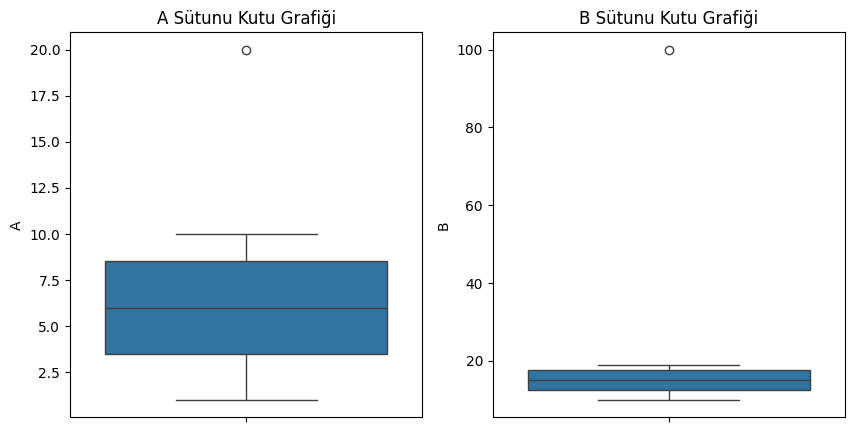


A Sütunu Z-skorları:
 0     1.166532
1     0.966034
2     0.765537
3     0.565039
4     0.364541
5     0.164044
6     0.036454
7     0.236952
8     0.437450
9     0.637947
10    2.642924
Name: A, dtype: float64

B Sütunu Z-skorları:
 0     0.496236
1     0.455802
2     0.415368
3     0.374934
4     0.334500
5     0.294066
6     0.253632
7     0.213198
8     0.172764
9     0.132330
10    3.142830
Name: B, dtype: float64

A Sütunu IQR: 5.0

B Sütunu IQR: 5.0


In [7]:
#Aykırı Değerleri Tespit Etme

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Örnek DataFrame
data = {'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20],
        'B': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 100]}
df = pd.DataFrame(data)

print("Orijinal DataFrame:\n", df)

# Aykırı değer tespiti (kutu grafikleri)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['A'])
plt.title('A Sütunu Kutu Grafiği')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['B'])
plt.title('B Sütunu Kutu Grafiği')
plt.show()

# Aykırı değer tespiti (z-skorları)
z_a = np.abs(stats.zscore(df['A']))
z_b = np.abs(stats.zscore(df['B']))
print("\nA Sütunu Z-skorları:\n", z_a)
print("\nB Sütunu Z-skorları:\n", z_b)

# Aykırı değer tespiti (IQR)
Q1_A = df['A'].quantile(0.25)
Q3_A = df['A'].quantile(0.75)
IQR_A = Q3_A - Q1_A
print("\nA Sütunu IQR:", IQR_A)

Q1_B = df['B'].quantile(0.25)
Q3_B = df['B'].quantile(0.75)
IQR_B = Q3_B - Q1_B
print("\nB Sütunu IQR:", IQR_B)

Orijinal DataFrame:
      C
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
9   10
10  50


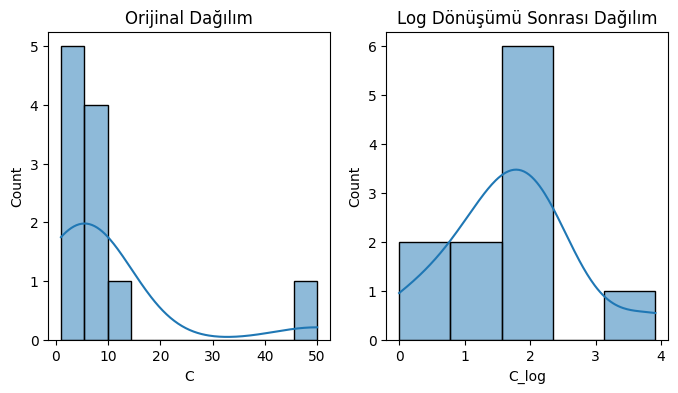


Log Dönüşümü Sonrası DataFrame:
      C     C_log
0    1  0.000000
1    2  0.693147
2    3  1.098612
3    4  1.386294
4    5  1.609438
5    6  1.791759
6    7  1.945910
7    8  2.079442
8    9  2.197225
9   10  2.302585
10  50  3.912023

Winsorized DataFrame:
      C     C_log  C_winsorized
0    1  0.000000             2
1    2  0.693147             2
2    3  1.098612             3
3    4  1.386294             4
4    5  1.609438             5
5    6  1.791759             6
6    7  1.945910             7
7    8  2.079442             8
8    9  2.197225             9
9   10  2.302585            10
10  50  3.912023            10

Trimmed DataFrame:
    C     C_log  C_winsorized
2  3  1.098612             3
3  4  1.386294             4
4  5  1.609438             5
5  6  1.791759             6
6  7  1.945910             7
7  8  2.079442             8
8  9  2.197225             9


In [8]:
# Aykırı Değerleri Dönüştürme veya Budama
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Örnek DataFrame
data = {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50]}
df = pd.DataFrame(data)

print("Orijinal DataFrame:\n", df)

# Orijinal dağılım
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['C'], kde=True)
plt.title('Orijinal Dağılım')

# Log dönüşümü
df['C_log'] = df['C'].apply(np.log)
plt.subplot(1, 2, 2)
sns.histplot(df['C_log'], kde=True)
plt.title('Log Dönüşümü Sonrası Dağılım')
plt.show()

print("\nLog Dönüşümü Sonrası DataFrame:\n", df)

# Winsorizing
from scipy.stats import iqr

alt_sinir = np.percentile(df['C'], 10)
ust_sinir = np.percentile(df['C'], 90)
df['C_winsorized'] = np.clip(df['C'], alt_sinir, ust_sinir)
print("\nWinsorized DataFrame:\n", df)

# Trimming
df_trimmed = df[(df['C'] > alt_sinir) & (df['C'] < ust_sinir)]
print("\nTrimmed DataFrame:\n", df_trimmed)

In [9]:
#Robust İstatistiksel Yöntemler Kullanma

import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler

# Örnek DataFrame
data = {'D': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]}
df = pd.DataFrame(data)

print("Orijinal DataFrame:\n", df)

# Ortalama ve Medyan Karşılaştırma
ortalama = df['D'].mean()
medyan = df['D'].median()
print("\nOrtalama:", ortalama)
print("Medyan:", medyan)

# Standart Sapma ve IQR Karşılaştırma
standart_sapma = df['D'].std()
Q1 = df['D'].quantile(0.25)
Q3 = df['D'].quantile(0.75)
IQR = Q3 - Q1
print("\nStandart Sapma:", standart_sapma)
print("IQR:", IQR)

# RobustScaler Uygulama
scaler = RobustScaler()
df['D_robust_scaled'] = scaler.fit_transform(df[['D']])
print("\nRobust Scaled DataFrame:\n", df)

Orijinal DataFrame:
       D
0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
10  100

Ortalama: 14.090909090909092
Medyan: 6.0

Standart Sapma: 28.637229424141385
IQR: 5.0

Robust Scaled DataFrame:
       D  D_robust_scaled
0     1             -1.0
1     2             -0.8
2     3             -0.6
3     4             -0.4
4     5             -0.2
5     6              0.0
6     7              0.2
7     8              0.4
8     9              0.6
9    10              0.8
10  100             18.8
